In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')
# Timer to measure the performance of methods
from time import time

In [2]:
################
#### Visser ####
################

def ddz(K, z):
    # This function calculates a numerical derivative of K(z),
    # using central or one-sided finite difference
    dz = 1e-6
    return np.where(z + dz > 0.0, (K(z) - K(z-dz)) / dz, (K(z+dz/2) - K(z-dz/2))/dz)

def step(K, z, dt):
    # Calculate new position after a random step
    # Implemented according to Visser:
    # Visser A., Mar Ecol Prog Ser, Vol. 158, pp 275-281, 1997
    Np = z.size
    dKdz = ddz(K, z)
    R = 2*np.random.random(size = Np) - 1
    r = 1.0/3
    return z + dKdz*dt + R*np.sqrt(( K(z+dKdz*dt/2) *dt*2/r))


###########################
#### Utility functions ####
###########################

def advect(z, v, dt):
    # Move all particles
    # Assuming constant speed (at least within a timestep)
    return z + dt*v

def reflect(z, bottom = None):
    # Reflect from surface and optionally bottom
    # Depth is positive downwards
    # Reflect from surface
    z = np.abs(z)
    if bottom is not None:
        # Reflect from bottom
        z[z > bottom] = 2*bottom - z[z > bottom]
    return z


##############################
#### Diffusivity profiles ####
##############################

def linearexponential(z):
    # Sort-of realistic looking diffusivity profile
    # Increases linearly from surface, then decays
    # Reaches a maximum at depth 1/alpha
    k0 = 1e-3
    k1 = 6e-3
    alpha = 0.5
    return k0 + k1*z*np.exp(-z*alpha)

In [8]:
#### Numerical parameters ####
Tmax = 6 * 3600
dt   = 10
Np   = 4000
Nt   = int(Tmax / dt)

#### Sinking speed ####
v = 1e-3

#### Diffusivity profile ####
K = linearexponential

#### Initial distribution ####
Z = np.random.uniform(low = 8, high = 10, size = Np)

#### Array to keep result ####
count = np.zeros(Nt)

tic = time()

#### Perform simulation ####
for n in range(Nt):
    # Count particles in top 5 m
    count[n] = np.sum(Z < 5)
    # Perform random walk
    Z = step(K, Z, dt)
    # Reflect from surface
    Z = reflect(Z)
    # Apply sinking velocity
    Z = advect(Z, v, dt)
    
toc = time()

print('Elapsed time: ', toc - tic)

Elapsed time:  1.3243498802185059


Text(0,0.5,'Particles')

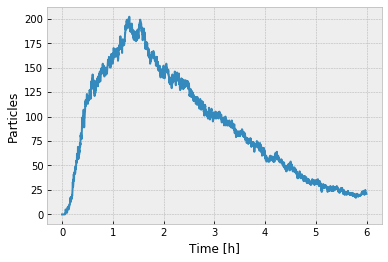

In [9]:
times = np.arange(0, Tmax, dt)

plt.plot(times / 3600, count)
plt.xlabel('Time [h]')
plt.ylabel('Particles')